In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import utils
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

pd.set_option('display.max_columns', 500)

# local modules
from utils.config import Config, Config_AE
import utils.utils as utils
import utils.plots as plots
import modelsNN.modelsNN as modelsNN

In [2]:

# Local:
# PATH_DEEPSF = 'C:/Users/joseb/Downloads/deepsf/data'
PATH_DEEPSF = '/home/ubuntu/git_repos/deepsf/data'

In [3]:
# %%% Setting deepAE NN characteristics.
configAE = Config_AE()
configAE.get_config()  
configSF = Config(if_ensemble = True)
configSF.get_config()

{'batch_size': 128,
 'optimizer': 'Adam',
 'epochs': 1000,
 'learning_rate': 0.0001,
 'if_wandb': True,
 'test_size': 0.2,
 'tumor_type': 'all'}

{'batch_size': 128,
 'optimizer': 'adamW',
 'modelNN': 'DeepSF_2hidden',
 'epochs': 3000,
 'learning_rate': 0.0001,
 'if_toy': False,
 'if_wandb': True,
 'test_size': 0.2,
 'num_genes': 898,
 'tumor_type': 'all',
 'if_ensemble': True}

In [4]:
# %%% Get the data
data_AE = utils.get_data_AE(PATH_DEEPSF, configAE)
data_prep = utils.get_data(PATH_DEEPSF, configSF)

/home/ubuntu/git_repos/deepsf/code_JS/utils/utils.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  one_TCGA_tpm_gn_RBPs = one_TCGA_tpm_gn.loc[listRBPs_intersect] # Dataframe of the expression of the SF genes.
/home/ubuntu/git_repos/deepsf/code_JS/utils/utils.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  one_TCGA_tpm_gn_RBPs = one_TCGA_tpm_gn.loc[listRBPs_intersect] # Dataframe of the expression of the SF genes.
/home/ubuntu/git_repos/deepsf/code_JS/utils/utils.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  one_TCGA_tpm_gn_RBPs = one_TCGA_tpm_gn.loc[listRBPs_intersect] # Dataframe of the expression of the SF genes.
/home/ubuntu/git_repos/deepsf/code_JS/utils/utils.py:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use 

In [5]:
PATH_MODEL = '/home/ubuntu/git_repos/deepsf/code_JS/wandb/run-20220711_082312-32y44uvf/files'
model_name = 'AE_with_Adam.pt_test'

data_ensemble = utils.get_model_loader_ensemble(model_name, PATH_MODEL, data_prep, data_AE, configSF)

model = data_ensemble.model
train_loader = data_ensemble.train_loader
val_loader = data_ensemble.val_loader

model

DeepSF_AE_Ensemble(
  (modelAE): Sequential(
    (0): Linear(in_features=19594, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=1279, out_features=183, bias=True)
  (bn1): BatchNorm1d(183, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=183, out_features=82, bias=True)
  (bn2): BatchNorm1d(82, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=594, out_features=10095, bias=True)
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: fcarazo (deepsf). Use `wandb login --relogin` to force relogin


Epoch [0], loss: 6.5140, val_loss: 4.6164
Epoch [1], loss: 3.4498, val_loss: 2.8539
Epoch [2], loss: 2.2892, val_loss: 2.1403
Epoch [3], loss: 1.7873, val_loss: 1.7953
Epoch [4], loss: 1.5206, val_loss: 1.6013
Epoch [5], loss: 1.3709, val_loss: 1.4757
Epoch [6], loss: 1.2566, val_loss: 1.3865
Epoch [7], loss: 1.1794, val_loss: 1.3211
Epoch [8], loss: 1.1303, val_loss: 1.2691
Epoch [9], loss: 1.0752, val_loss: 1.2275
Epoch [10], loss: 1.0422, val_loss: 1.1923
Epoch [11], loss: 1.0038, val_loss: 1.1613
Epoch [12], loss: 0.9798, val_loss: 1.1378
Epoch [13], loss: 0.9534, val_loss: 1.1158
Epoch [14], loss: 0.9317, val_loss: 1.0952
Epoch [15], loss: 0.9185, val_loss: 1.0777
Epoch [16], loss: 0.9009, val_loss: 1.0626
Epoch [17], loss: 0.8901, val_loss: 1.0473
Epoch [18], loss: 0.8647, val_loss: 1.0350
Epoch [19], loss: 0.8661, val_loss: 1.0212
Epoch [20], loss: 0.8351, val_loss: 1.0099
Epoch [21], loss: 0.8270, val_loss: 0.9985
Epoch [22], loss: 0.8117, val_loss: 0.9886
Epoch [23], loss: 0.7

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/ubuntu/git_repos/deepsf/venv-deepsf/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


cor_total_training,▁
cor_total_validation,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
cor_total_training,0.86622
cor_total_validation,0.84696
epoch,2999


0.8662186521524374

,gene_name,trans_name,cor_values
0,HOXA11,ENST00000006015,0.947979
1,CD79B,ENST00000006750,0.775138
2,CD74,ENST00000009530,0.960175
3,RANBP3,ENST00000034275,0.832678
4,GOPC,ENST00000052569,0.944215
...,...,...,...
10090,CRLF2,ENSTR0000381566,NaN
10091,CRLF2,ENSTR0000381567,NaN
10092,CRLF2,ENSTR0000400841,NaN
10093,P2RY8,ENSTR0000460672,NaN


0.846957841675211

,gene_name,trans_name,cor_values
0,HOXA11,ENST00000006015,0.927236
1,CD79B,ENST00000006750,0.692124
2,CD74,ENST00000009530,0.937135
3,RANBP3,ENST00000034275,0.767728
4,GOPC,ENST00000052569,0.893199
...,...,...,...
10090,CRLF2,ENSTR0000381566,NaN
10091,CRLF2,ENSTR0000381567,NaN
10092,CRLF2,ENSTR0000400841,NaN
10093,P2RY8,ENSTR0000460672,NaN


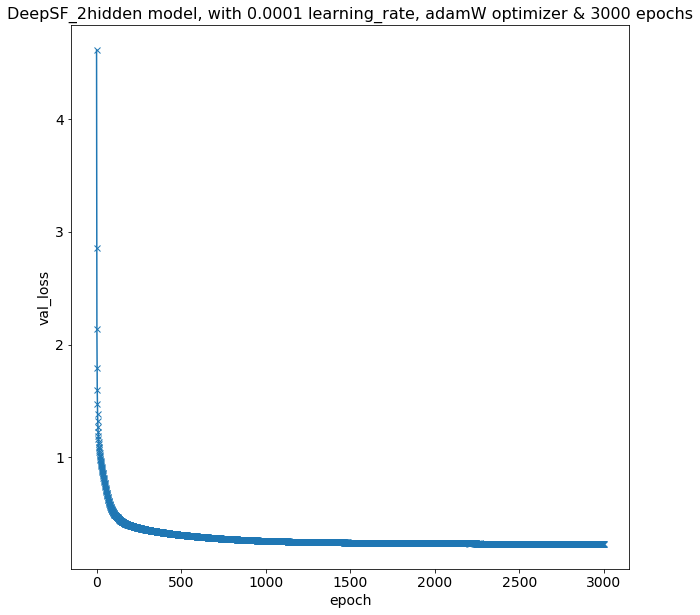

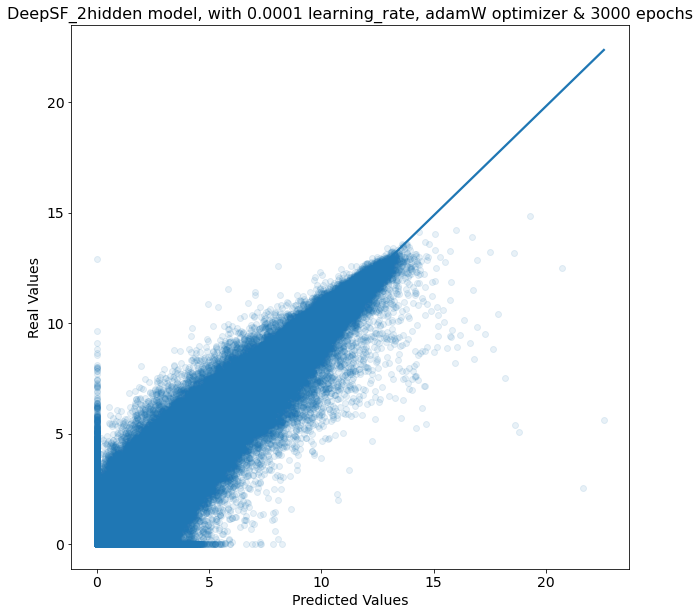

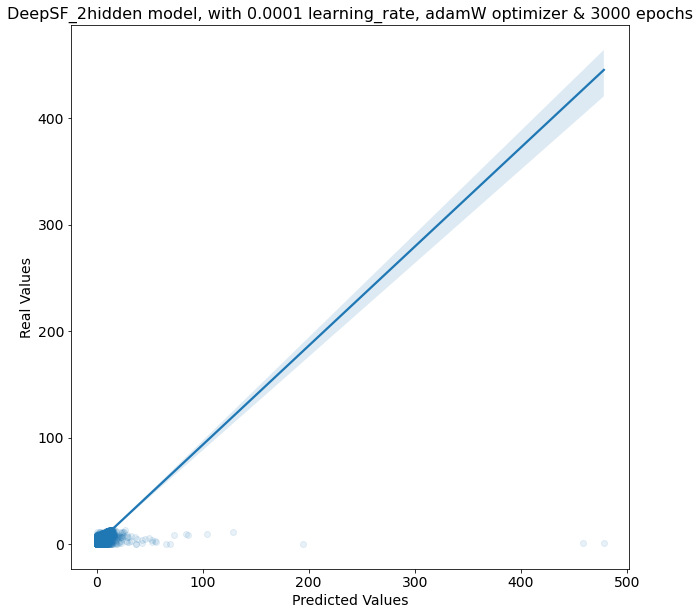

<Figure size 180x90 with 0 Axes>

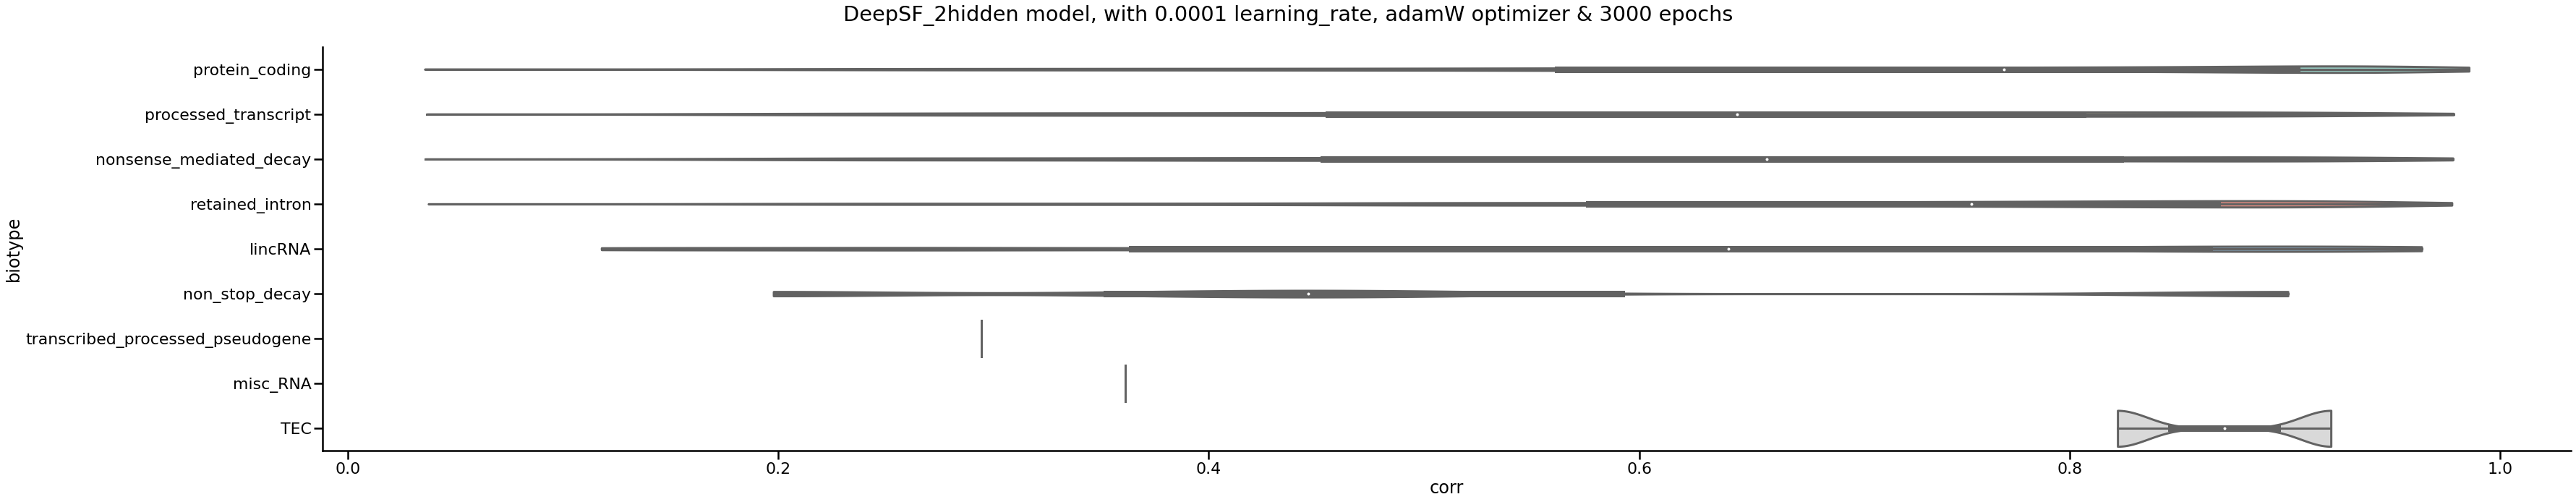

<Figure size 180x90 with 0 Axes>

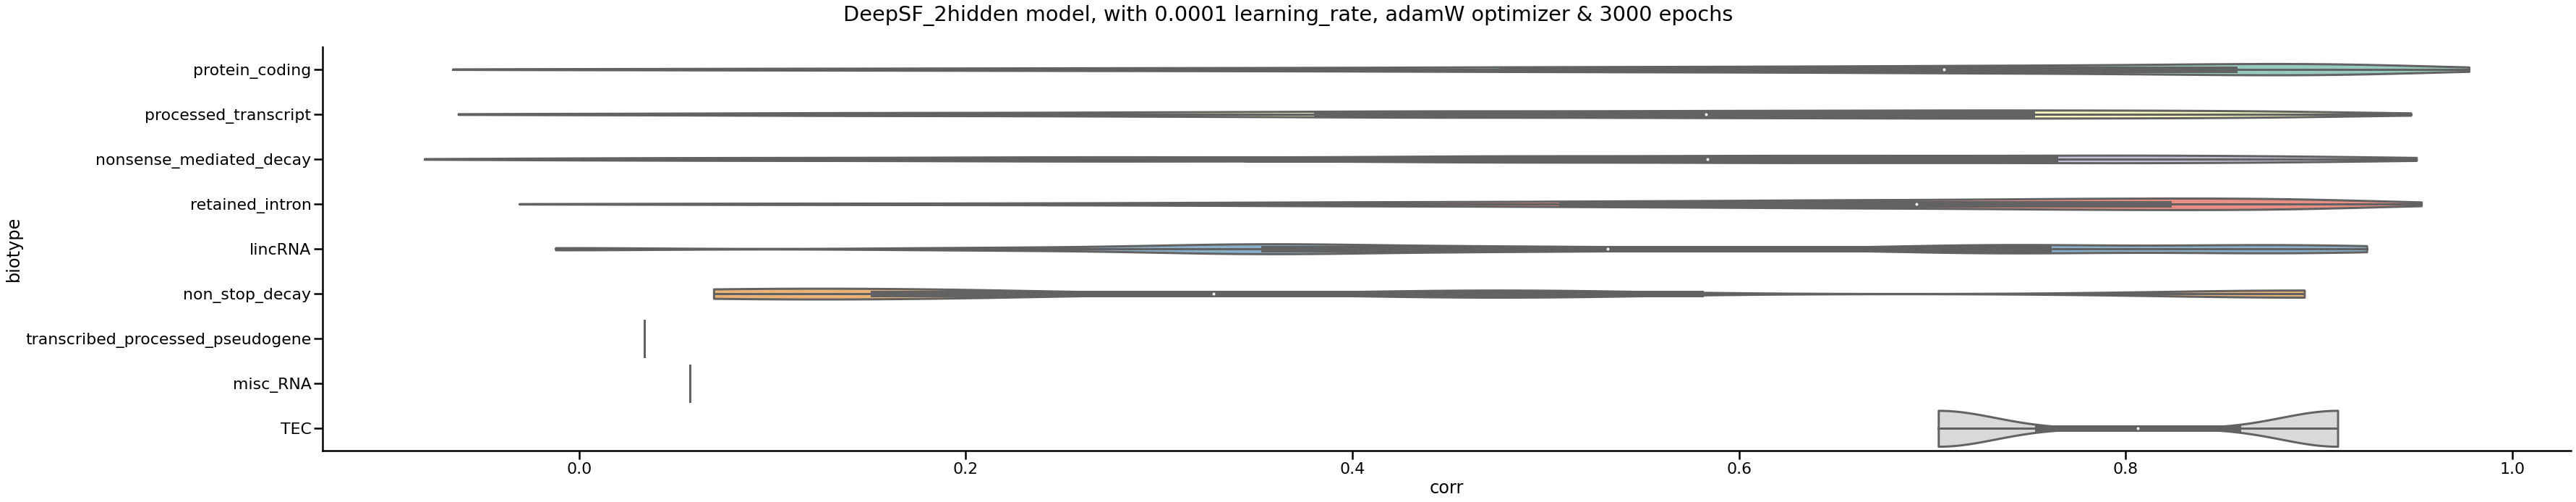

In [6]:
optimizer = utils.build_optimizer(model, configSF.optimizer, configSF.learning_rate)
history = utils.fit(configSF.epochs, 
                    model, 
                    train_loader, 
                    val_loader, 
                    optimizer=optimizer,
                    hyperparameters = configSF.get_config(),
                    if_wandb = configSF.if_wandb,
                    path = PATH_MODEL,
                    model_name = 'AE_with_Adam_ensembl.pt',
                    project_name = 'DeepSF_AE_Ensemble_training')

# %%% Plot results
solution = plots.plot_results(history = history, 
                     scaledTrain_df = data_prep.scaledTrain_df, 
                     train_labels = data_prep.train_labels, 
                     scaled_train_gn = data_prep.scaled_train_gn, 
                     scaledValidation_df = data_prep.scaledValidation_df, 
                     valid_labels = data_prep.valid_labels , 
                     scaled_valid_gn = data_prep.scaled_valid_gn, 
                     model = model, 
                     getBM = data_prep.getBM,
                     if_wandb = configSF.if_wandb,
                     config = configSF,
                     if_ensemble=configSF.if_ensemble, 
                     xa_tr = data_AE.TCGA_tpm_gn_prot_cod_log2p.loc[data_prep.scaledTrain_df.index],
                     xa_val = data_AE.TCGA_tpm_gn_prot_cod_log2p.loc[data_prep.scaledValidation_df.index])
        
if configSF.if_wandb:
    wandb.finish()

solution.solution_train_cor_total
solution.solution_train_df
solution.solution_val_cor_total
solution.solution_val_df

In [8]:
# Deeplift
df_score_SFs = utils.do_deeplift(model, 
                 X_test = data_prep.scaledValidation_df,
                 gn_test = data_prep.scaled_valid_gn, 
                 y_test = data_prep.valid_labels, 
                 data_prep = data_prep, 
                 if_ensemble = configSF.if_ensemble,
                 xa_test = data_AE.TCGA_tpm_gn_prot_cod_log2p.loc[data_prep.scaledValidation_df.index])
df_score_SFs.head()

/home/ubuntu/git_repos/deepsf/venv-deepsf/lib/python3.8/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/ubuntu/git_repos/deepsf/venv-deepsf/lib/python3.8/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


AttributeError: 'NoneType' object has no attribute '_log'